In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.othermod.betareg import BetaModel


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feature Engineering

We want to:
- handle missing values,
- deal with cat variables(one hot encoding)
- standardize numerical variables
- explore features that are important

I did not transform the cat variables 'SchoolName','DistrictName', and 'CountyName', might need to focus only on the top 5 levels

In [3]:
df=pd.read_csv('/content/drive/MyDrive/ds4a project_Team 30/Data Porfolio/comprehensive_0718_v1.csv', thousands=',',dtype={'MedianIncome':'int'})
df.dtypes

Unnamed: 0.2                          int64
Unnamed: 0.1                          int64
SchoolCode                            int64
CohortStudents                      float64
Dropout (Count)                     float64
Dropout Rate                        float64
Unnamed: 0                            int64
SchoolName                           object
DistrictCode                          int64
DistrictName                         object
CountyCode                            int64
CountyName                           object
FundPerStudent                      float64
Educational Option Type              object
Enrollment (K-12)                     int64
Free Meal Count (K-12)                int64
Percent (%) Eligible Free (K-12)    float64
Low Grade                            object
High Grade                           object
Enrollment (Ages 5-17)                int64
TotalFTE                            float64
ClearFTE                            float64
OtherFTE                        

Drop the columns that are not very important (this analysis has been done by team members separately)
- Coco (free lunch data) drop: low grade, high grade, Unnamed: 0,Dropout (Count),Unnamed: 0.1
- Arcy (income data) drop: SEDcount, SEDpct


In [4]:
data = df.drop(columns= ['Unnamed: 0','Dropout (Count)','Unnamed: 0.1','Low Grade', 'Unnamed: 0.2',
                           'High Grade'])

In [ ]:
data.describe()

,SchoolCode,CohortStudents,Dropout Rate,DistrictCode,CountyCode,FundPerStudent,Enrollment (K-12),Free Meal Count (K-12),Percent (%) Eligible Free (K-12),Enrollment (Ages 5-17),...,UCCSUCourses,UCCSUEnrollment,StaffACourses,StaffAEnrollment,StaffBCourses,StaffBEnrollment,StaffNCourses,StaffNEnrollment,NCLBCoreCourses,NCLBEnrollment
count,1.498000e+03,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,...,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,2.218759e+06,4189.001335,0.091899,67485.680240,27.577437,30099.548106,1065.018024,523.487984,0.564267,1026.708278,...,165.540721,4323.775701,1.136849,30.964619,0.326435,6.666889,2.353805,30.227637,4.986649,75.642190
std,1.702553e+06,3396.412648,0.123909,4086.152648,13.896399,18959.545330,945.417668,525.232118,0.238612,928.411301,...,156.678666,4430.739338,14.165897,400.181860,3.962700,83.342910,46.053761,403.341430,79.884250,907.654116
min,1.000650e+05,44.000000,0.000000,61119.000000,1.000000,2297.174017,2.000000,1.000000,0.031670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.370850e+05,1285.000000,0.020111,64733.000000,19.000000,16928.273753,184.000000,101.000000,0.375220,154.250000,...,36.250000,449.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.937452e+06,3256.000000,0.047023,66977.000000,28.000000,27875.025863,749.500000,339.000000,0.580020,726.500000,...,113.000000,2574.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.631724e+06,6703.000000,0.115717,69427.000000,37.000000,39273.625797,1841.000000,815.000000,0.755052,1792.750000,...,282.000000,7742.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.034664e+06,31008.000000,1.000000,76976.000000,58.000000,389418.404524,4580.000000,3281.000000,1.000000,4485.000000,...,1851.000000,22562.000000,282.000000,8110.000000,76.000000,1680.000000,1691.000000,11791.000000,2725.000000,17551.000000


Need to rename the confusing variables, I still am not sure about (work on later):
- UCCSUCourses'
- 'UCCSUEnrollment'
- 'StaffACourses'
- 'StaffAEnrollment'
- 'StaffBCourses'
- 'StaffBEnrollment'
- 'StaffNCourses'
- 'StaffNEnrollment'
- 'NCLBCoreCourses'
- 'NCLBEnrollment'
- 'TotalFTE'
- 'ClearFTE'
- 'OtherFTE',

In [5]:
data = data.rename(columns={'CohortStudents': 'total_students',
                           'EnrollmentWhite':'EnrollmentWhitePct', 'EnrollmentBlack':'EnrollmentBlackPct',
       'EnrollmentAsian':'EnrollmentAsianPct', 'EnrollmentHispanic':'EnrollmentHispanicPct', 'EnrollmentNative':'EnrollmentNativePct'})

We do not want to look at only the count data, but percentage and further standardize those number to assure everyone on the same scale

In [6]:
for col in data[['EnrollmentWhitePct', 'EnrollmentBlackPct','EnrollmentAsianPct', 'EnrollmentHispanicPct', 'EnrollmentNativePct']]:
    data[col] = data[col].replace("*", 0).astype(int)/data['total_students']

In [7]:
for col in data[['UCCSUEnrollment', 'StaffAEnrollment', 'StaffBEnrollment', 'StaffNEnrollment', 'NCLBEnrollment']]:
    data[col] = data[col]/data['total_students']

In [ ]:
#for col in data[['UCCSUCourses', 'StaffACourses', 'StaffBCourses','StaffNCourses', 'NCLBCoreCourses']]:
   # data[col] = data[col].astype(int)/data['TotalCourses']

In [ ]:
data.head(5)

,SchoolCode,total_students,Dropout Rate,SchoolName,DistrictCode,DistrictName,CountyCode,CountyName,FundPerStudent,Educational Option Type,...,UCCSUCourses,UCCSUEnrollment,StaffACourses,StaffAEnrollment,StaffBCourses,StaffBEnrollment,StaffNCourses,StaffNEnrollment,NCLBCoreCourses,NCLBEnrollment
0,1933316,648.0,0.265432,Puente Hills High,73445,Hacienda la Puente Unified,19,Los Angeles,52531.924336,Alternative School of Choice,...,40.0,0.182099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1934801,3876.0,0.010320,La Puente High,73445,Hacienda la Puente Unified,19,Los Angeles,52531.924336,Traditional,...,161.0,1.227812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1935246,6380.0,0.032602,Los Altos High,73445,Hacienda la Puente Unified,19,Los Angeles,52531.924336,Traditional,...,288.0,1.237931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1938935,2168.0,0.154982,Valley Alternative High (Continuation),73445,Hacienda la Puente Unified,19,Los Angeles,52531.924336,Continuation School,...,67.0,0.225554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1939834,4944.0,0.025081,Glen A. Wilson High,73445,Hacienda la Puente Unified,19,Los Angeles,52531.924336,Traditional,...,226.0,1.327670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After this transformation, rename the variables into 'pct' so we are all clear on what the values represent right now

In [8]:
data = data.rename(columns={'UCCSUEnrollment':'UCCSUEnrollmentPct', 'StaffAEnrollment':'StaffAEnrollmentPct', 'StaffBEnrollment':'StaffBEnrollmentPct',
                           'StaffNEnrollment':'StaffNEnrollmentPct', 'NCLBEnrollment':'NCLBEnrollmentPct'})

In [ ]:
data.describe()

,SchoolCode,total_students,Dropout Rate,DistrictCode,CountyCode,FundPerStudent,Enrollment (K-12),Free Meal Count (K-12),Percent (%) Eligible Free (K-12),Enrollment (Ages 5-17),...,UCCSUCourses,UCCSUEnrollmentPct,StaffACourses,StaffAEnrollmentPct,StaffBCourses,StaffBEnrollmentPct,StaffNCourses,StaffNEnrollmentPct,NCLBCoreCourses,NCLBEnrollmentPct
count,1.498000e+03,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,...,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,2.218759e+06,4189.001335,0.091899,67485.680240,27.577437,30099.548106,1065.018024,523.487984,0.564267,1026.708278,...,165.540721,0.897369,1.136849,0.005050,0.326435,0.001328,2.353805,0.005293,4.986649,0.012817
std,1.702553e+06,3396.412648,0.123909,4086.152648,13.896399,18959.545330,945.417668,525.232118,0.238612,928.411301,...,156.678666,0.658213,14.165897,0.057084,3.962700,0.015882,46.053761,0.063415,79.884250,0.137265
min,1.000650e+05,44.000000,0.000000,61119.000000,1.000000,2297.174017,2.000000,1.000000,0.031670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.370850e+05,1285.000000,0.020111,64733.000000,19.000000,16928.273753,184.000000,101.000000,0.375220,154.250000,...,36.250000,0.330751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.937452e+06,3256.000000,0.047023,66977.000000,28.000000,27875.025863,749.500000,339.000000,0.580020,726.500000,...,113.000000,1.007229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.631724e+06,6703.000000,0.115717,69427.000000,37.000000,39273.625797,1841.000000,815.000000,0.755052,1792.750000,...,282.000000,1.336145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.034664e+06,31008.000000,1.000000,76976.000000,58.000000,389418.404524,4580.000000,3281.000000,1.000000,4485.000000,...,1851.000000,10.000000,282.000000,0.922764,76.000000,0.420833,1691.000000,1.754065,2725.000000,2.839431


In [9]:
# data['EnrollmentWhitePct'] = data['EnrollmentWhitePct'] - data['EnrollmentWhitePct'].mean()/data['EnrollmentWhitePct'].std()
# data['EnrollmentBlackPct']=data['EnrollmentBlackPct'] - data['EnrollmentBlackPct'].mean()/data['EnrollmentBlackPct'].std()
# data['EnrollmentAsianPct'] = data['EnrollmentAsianPct'] - data['EnrollmentAsianPct'].mean()/data['EnrollmentAsianPct'].std()
# data['EnrollmentHispanicPct'] = data['EnrollmentHispanicPct'] - data['EnrollmentHispanicPct'].mean()/data['EnrollmentHispanicPct'].std()
# data['EnrollmentNativePct'] = data['EnrollmentNativePct'] - data['EnrollmentNativePct'].mean()/data['EnrollmentNativePct'].std()
# #data['UCCSUCoursesPct']=data['UCCSUCoursesPct'] - data['UCCSUCoursesPct'].mean()/data['UCCSUCoursesPct'].std()
# data['UCCSUEnrollmentPct']=data['UCCSUEnrollmentPct'] - data['UCCSUEnrollmentPct'].mean()/data['UCCSUEnrollmentPct'].std()
# #data['StaffACoursesPct'] =data['StaffACoursesPct'] - data['StaffACoursesPct'].mean()/data['StaffACoursesPct'].std()
# data['StaffAEnrollmentPct'] =data['StaffAEnrollmentPct'] - data['StaffAEnrollmentPct'].mean()/data['StaffAEnrollmentPct'].std()

# #data['StaffBCoursesPct']=data['StaffBCoursesPct'] - data['StaffBCoursesPct'].mean()/data['StaffBCoursesPct'].std()
# data['StaffBEnrollmentPct']=data['StaffBEnrollmentPct'] - data['StaffBEnrollmentPct'].mean()/data['StaffBEnrollmentPct'].std()
# #data['StaffNCoursesPct']=data['StaffNCoursesPct'] - data['StaffNCoursesPct'].mean()/data['StaffNCoursesPct'].std()
# data['StaffNEnrollmentPct']=data['StaffNEnrollmentPct'] - data['StaffNEnrollmentPct'].mean()/data['StaffNEnrollmentPct'].std()

# #data['NCLBCoreCoursesPct']=data['NCLBCoreCoursesPct'] - data['NCLBCoreCoursesPct'].mean()/data['NCLBCoreCoursesPct'].std()
# data['NCLBEnrollmentPct']=data['NCLBEnrollmentPct'] - data['NCLBEnrollmentPct'].mean()/data['NCLBEnrollmentPct'].std()

data_traditional=data[data['Educational Option Type']=='Traditional']
data = pd.concat([data, pd.get_dummies(df['Educational Option Type'])], axis=1)

In [10]:
data.columns

Index(['SchoolCode', 'total_students', 'Dropout Rate', 'SchoolName',
       'DistrictCode', 'DistrictName', 'CountyCode', 'CountyName',
       'FundPerStudent', 'Educational Option Type', 'Enrollment (K-12)',
       'Free Meal Count (K-12)', 'Percent (%) Eligible Free (K-12)',
       'Enrollment (Ages 5-17)', 'TotalFTE', 'ClearFTE', 'OtherFTE',
       'EnrollmentTotal', 'EnrollmentWhitePct', 'EnrollmentBlackPct',
       'EnrollmentAsianPct', 'EnrollmentHispanicPct', 'EnrollmentNativePct',
       'CountyMedianIncome', 'MedianIncome', 'TotalCourses', 'TotalEnrollment',
       'UCCSUCourses', 'UCCSUEnrollmentPct', 'StaffACourses',
       'StaffAEnrollmentPct', 'StaffBCourses', 'StaffBEnrollmentPct',
       'StaffNCourses', 'StaffNEnrollmentPct', 'NCLBCoreCourses',
       'NCLBEnrollmentPct', 'Alternative School of Choice',
       'Community Day School', 'Continuation School',
       'Special Education School', 'Traditional'],
      dtype='object')

Handle the missing values by deleting NAs

In [ ]:
data.fillna(0, inplace=True)
data.isna().any()

SchoolCode                          False
total_students                      False
Dropout Rate                        False
SchoolName                          False
DistrictCode                        False
DistrictName                        False
CountyCode                          False
CountyName                          False
FundPerStudent                      False
Educational Option Type             False
Enrollment (K-12)                   False
Free Meal Count (K-12)              False
Percent (%) Eligible Free (K-12)    False
Enrollment (Ages 5-17)              False
TotalFTE                            False
ClearFTE                            False
OtherFTE                            False
EnrollmentTotal                     False
EnrollmentWhitePct                  False
EnrollmentBlackPct                  False
EnrollmentAsianPct                  False
EnrollmentHispanicPct               False
EnrollmentNativePct                 False
CountyMedianIncome                

## Exploratory Data Analysis

We will use heatmaps to find out the correlations among all variables and then look at the relationship between each variable from appropriate plots in the EDA section.

### Heatmap and correlations

<ipython-input-43-d2a7cc1bce0f>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = mycorrdata.corr().round(2)


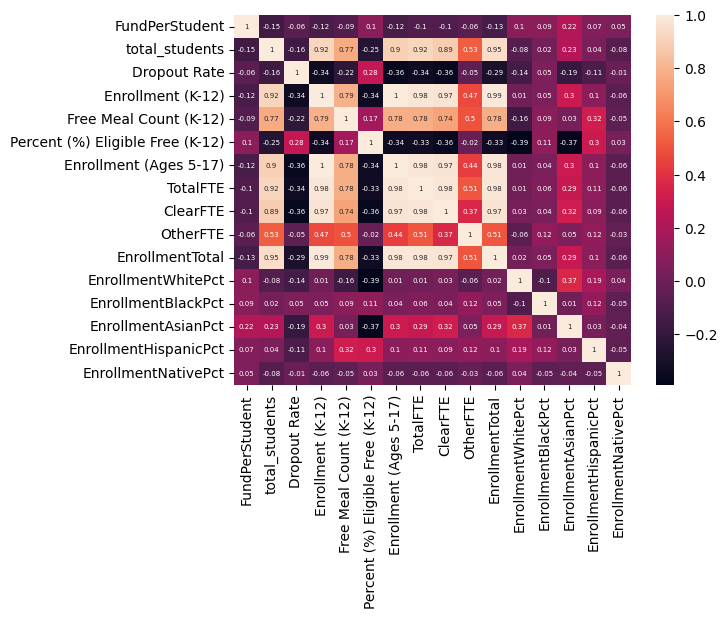

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
mycorrdata = data[['FundPerStudent', 'total_students', 'Dropout Rate',
       'Educational Option Type', 'Enrollment (K-12)',
       'Free Meal Count (K-12)', 'Percent (%) Eligible Free (K-12)',
       'Enrollment (Ages 5-17)', 'TotalFTE', 'ClearFTE', 'OtherFTE',
       'EnrollmentTotal', 'EnrollmentWhitePct', 'EnrollmentBlackPct',
       'EnrollmentAsianPct', 'EnrollmentHispanicPct', 'EnrollmentNativePct']]

mycorrdata2 = data[['Dropout Rate','TotalCourses', 'TotalEnrollment', 'UCCSUCourses',
       'UCCSUEnrollmentPct', 'StaffACourses', 'StaffAEnrollmentPct',
       'StaffBCourses', 'StaffBEnrollmentPct', 'StaffNCourses',
       'StaffNEnrollmentPct', 'NCLBCoreCourses', 'NCLBEnrollmentPct',
       'CountyMedianIncome', 'MedianIncome','Alternative School of Choice',
       'Community Day School', 'Continuation School',
       'Special Education School', 'Traditional']]


mycorrdata3 = data[['TotalCourses', 'TotalEnrollment', 'UCCSUCourses',
       'UCCSUEnrollmentPct', 'StaffACourses', 'StaffAEnrollmentPct',
       'StaffBCourses', 'StaffBEnrollmentPct', 'StaffNCourses',
       'StaffNEnrollmentPct', 'NCLBCoreCourses', 'NCLBEnrollmentPct']]

mycorrdata4 = data[['FundPerStudent', 'total_students', 'Dropout Rate',
       'Educational Option Type',
       'Free Meal Count (K-12)', 'Percent (%) Eligible Free (K-12)',
    'ClearFTE', 'OtherFTE','CountyMedianIncome', 'MedianIncome','Alternative School of Choice',
       'Community Day School', 'Continuation School',
       'Special Education School', 'Traditional']]


matrix = mycorrdata.corr().round(2)
sns.heatmap(matrix, annot=True, annot_kws={"size": 5})
plt.show()

In [ ]:
data = data.drop(columns= ['Enrollment (K-12)', 'Enrollment (Ages 5-17)', 'TotalFTE','EnrollmentTotal'])

From the heatmaps, variables with very high correlations are:
- total student  & enrollment(5-17): 0.9
- total student  & enrollment(K12): 0.92
- enrollment total  & enrollment(K12): 0.99
- enrollment total  & enrollment(5-17): 0.98
- Total FTE & enrollment(5-17): 0.98
- Clear FTE & enrollment(5-17): 0.97
- Total FTE & Clear FTE: 0.98
- Total FTE & enrollment total: 0.98
- Clear FTE & enrollment total: 0.97

Thus, for total student, enrollment(5-17), enrollment(K12), Total FTE, and clear FTE, we might want to only keep a few variables here, variables we want to keep
- total student
- total FTE
- clear FTE

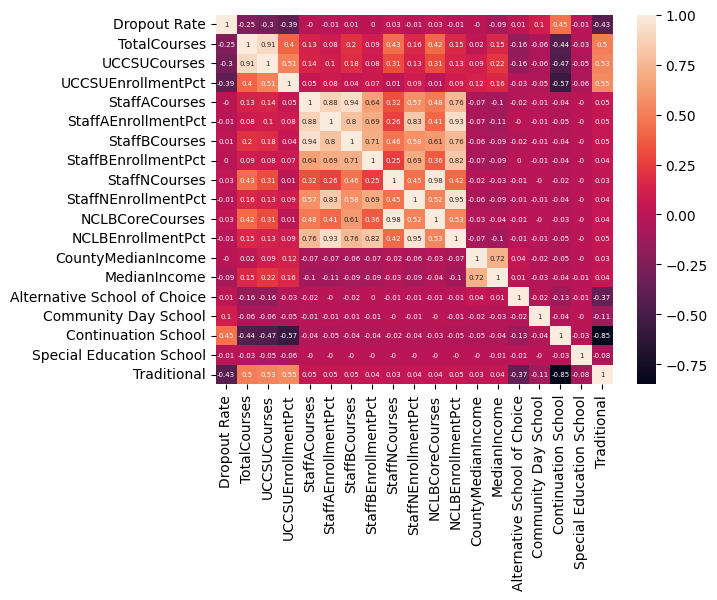

In [ ]:
mycorrdata2 = data[['Dropout Rate','TotalCourses', 'UCCSUCourses',
       'UCCSUEnrollmentPct', 'StaffACourses', 'StaffAEnrollmentPct',
       'StaffBCourses', 'StaffBEnrollmentPct', 'StaffNCourses',
       'StaffNEnrollmentPct', 'NCLBCoreCourses', 'NCLBEnrollmentPct',
       'CountyMedianIncome', 'MedianIncome','Alternative School of Choice',
       'Community Day School', 'Continuation School',
       'Special Education School', 'Traditional']]


matrix = mycorrdata2.corr().round(2)
sns.heatmap(matrix, annot=True, annot_kws={"size": 5})
plt.show()

In [ ]:
data = data.drop(columns= ['StaffBCourses', 'StaffBEnrollmentPct', 'StaffNCourses',
       'StaffNEnrollmentPct', 'NCLBCoreCourses', 'NCLBEnrollmentPct'])

From the heatmaps, variables with very high correlations are:
- staffAcoursePCT  & staffBcoursePCT: 0.92
- staffAcoursePCT  & staffAEnrollmentPCT: 0.99
- staffAcoursePCT  & NCLBCorecoursePCT: 0.92
- staffAcoursePCT  & NCLBEnrollmentPCT: 0.91
- staffAEnrollmentPCT & staffBcoursePCT: 0.93
- staffAEnrollmentPCT & NCLBCorecoursePCT: 0.94
- staffAEnrollmentPCT & NCLBEnrollmentPCT: 0.93
- staffBcoursePCT &NCLBCorecoursePCT: 0.92
- staffBcoursePCT & NCLBEnrollmentPCT: 0.91
- staffNcoursePCT & staffAEnrollmentPCT: 0.98
- staffNcoursePCT & NCLBCorecoursePCT: 0.96
- staffNcoursePCT & NCLBEnrollmentPCT: 0.96
- staffNEnrollmentPCT & NCLBCorecoursePCT: 0.95
- staffNEnrollmentPCT & NCLBEnrollmentPCT: 0.96
- total courses & total enrollments: 0.9
- UCCSUCoursesPct & UCCSUEnrollmentPct: 0.95

Thus, for staffAcoursePCT, staffBcoursePCT, NCLBCorecoursePCT, NCLBEnrollmentPCT, staffAEnrollmentPCT, staffNcoursePCT, staffNEnrollmentPCT, we can only keep one! I suggest only keep
- UCCSUCoursesPct
- total courses
- total enrollments

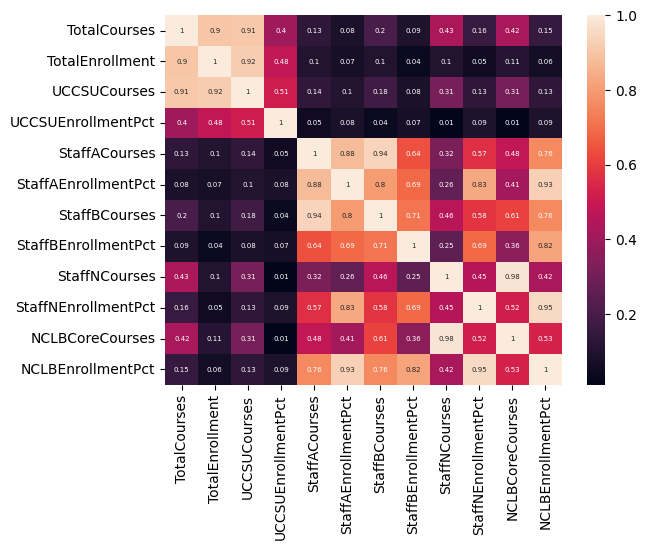

In [ ]:
matrix = mycorrdata3.corr().round(2)
sns.heatmap(matrix, annot=True, annot_kws={"size": 5})
plt.show()

<ipython-input-45-0f1cc098d55b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = mycorrdata4.corr().round(2)


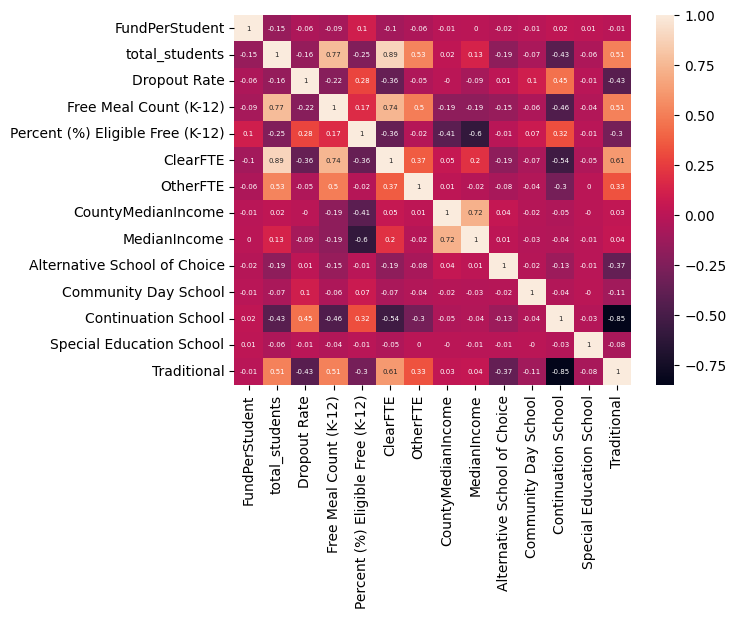

In [ ]:
matrix = mycorrdata4.corr().round(2)
sns.heatmap(matrix, annot=True, annot_kws={"size": 5})
plt.show()

### Boxplots (cat variable)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Alternative School of Choice'),
  Text(1, 0, 'Traditional'),
  Text(2, 0, 'Continuation School'),
  Text(3, 0, 'Community Day School'),
  Text(4, 0, 'Special Education School')])

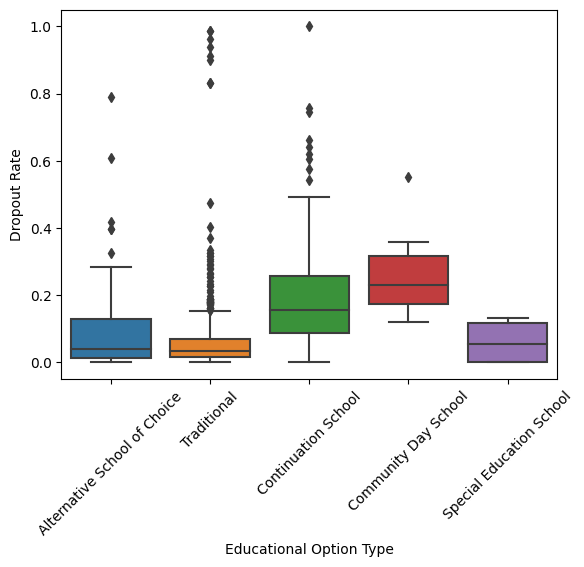

In [ ]:
g =sns.boxplot(x='Educational Option Type', y='Dropout Rate', data=data)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

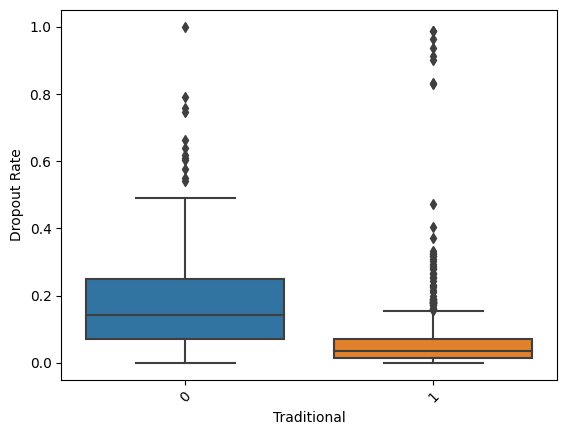

In [ ]:
g =sns.boxplot(x='Traditional', y='Dropout Rate', data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Alternative School of Choice'),
  Text(1, 0, 'Traditional'),
  Text(2, 0, 'Continuation School'),
  Text(3, 0, 'Community Day School'),
  Text(4, 0, 'Special Education School')])

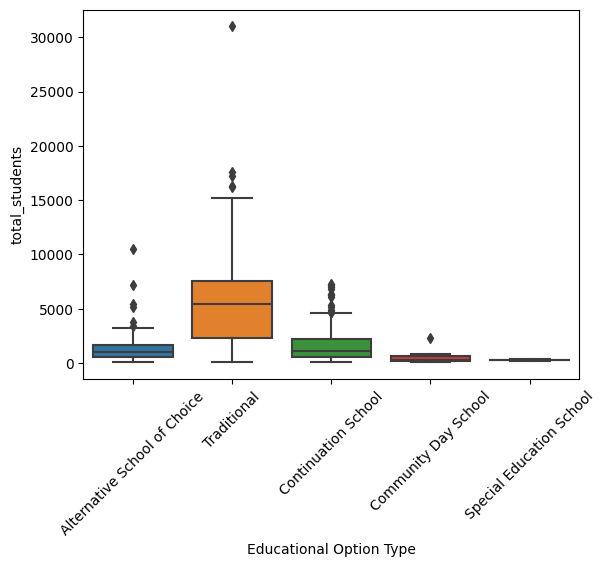

In [ ]:
g =sns.boxplot(x='Educational Option Type', y='total_students', data=data)
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

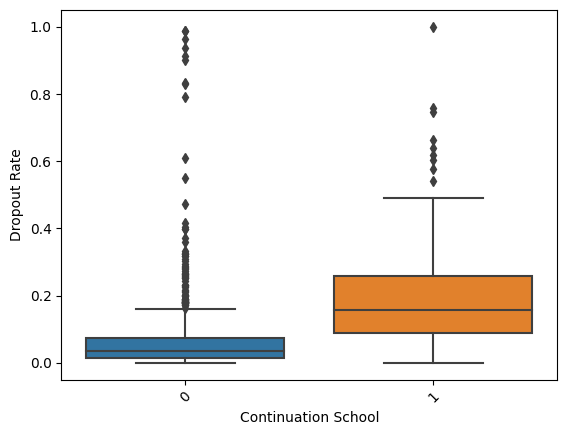

In [ ]:
g =sns.boxplot(x='Continuation School', y='Dropout Rate', data=data)
plt.xticks(rotation=45)

The total number of students vary significantly among different types of schools

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Alternative School of Choice'),
  Text(1, 0, 'Traditional'),
  Text(2, 0, 'Continuation School'),
  Text(3, 0, 'Community Day School'),
  Text(4, 0, 'Special Education School')])

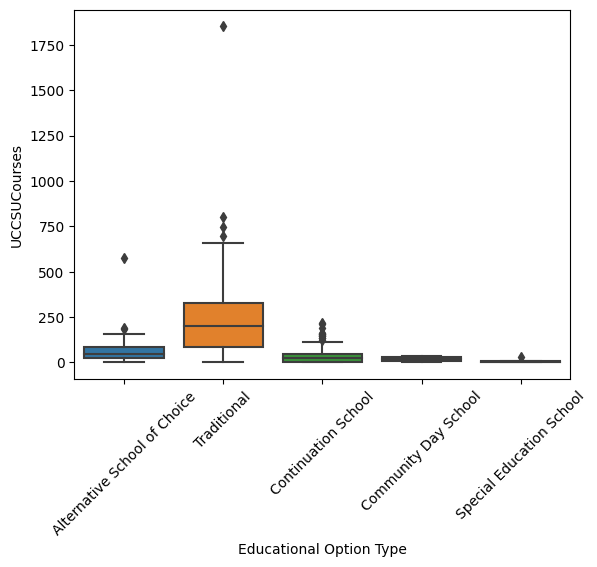

In [ ]:
g =sns.boxplot(x='Educational Option Type', y='UCCSUCourses', data=data)
plt.xticks(rotation=45)

The UCCSU courses vary significantly among different types of schools. Where traditional has more of those courses and special education school has less.

We have many extreme outliers for alternative school of choice, traditional and continuation school. Community Day school has higher drop out rates on average, then continuation school. The max drop out comes from continuation school. Traditional school has on average lowest dropout.

### Scatter plots and other (num variable)

In [ ]:
data.columns

Index(['SchoolCode', 'total_students', 'Dropout Rate', 'SchoolName',
       'DistrictCode', 'DistrictName', 'CountyCode', 'CountyName',
       'FundPerStudent', 'Educational Option Type', 'Free Meal Count (K-12)',
       'Percent (%) Eligible Free (K-12)', 'ClearFTE', 'OtherFTE',
       'EnrollmentWhitePct', 'EnrollmentBlackPct', 'EnrollmentAsianPct',
       'EnrollmentHispanicPct', 'EnrollmentNativePct', 'CountyMedianIncome',
       'MedianIncome', 'TotalCourses', 'TotalEnrollment', 'UCCSUCourses',
       'UCCSUEnrollmentPct', 'StaffACourses', 'StaffAEnrollmentPct',
       'Alternative School of Choice', 'Community Day School',
       'Continuation School', 'Special Education School', 'Traditional'],
      dtype='object')

In [ ]:
data = data.drop(columns= ['EnrollmentWhitePct', 'EnrollmentBlackPct', 'EnrollmentAsianPct',
       'EnrollmentHispanicPct', 'EnrollmentNativePct'])
data_traditional=data_traditional.drop(columns= ['EnrollmentWhitePct', 'EnrollmentBlackPct', 'EnrollmentAsianPct',
       'EnrollmentHispanicPct', 'EnrollmentNativePct'])

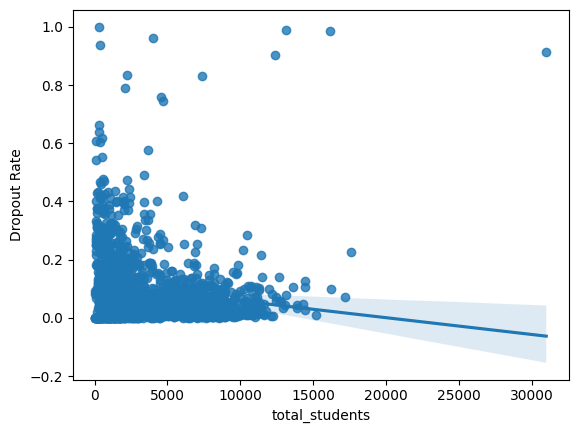

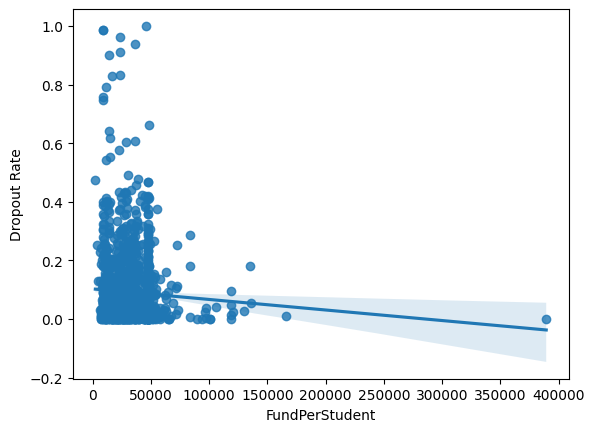

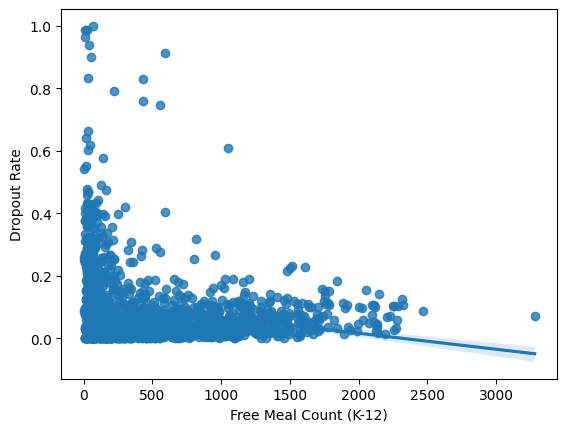

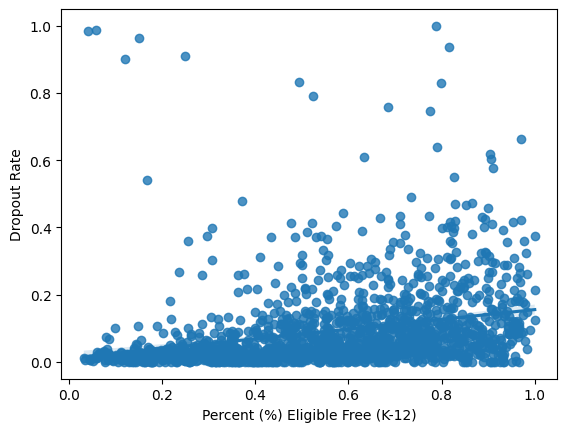

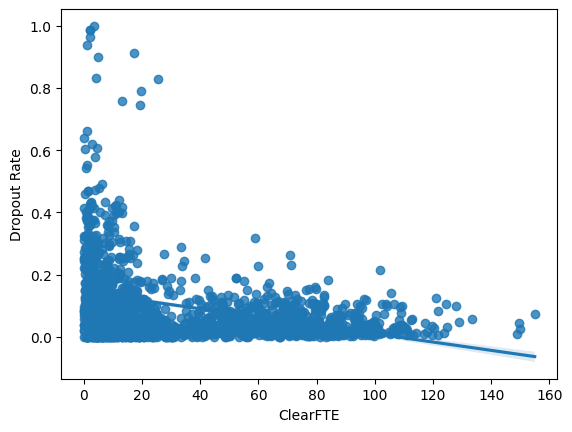

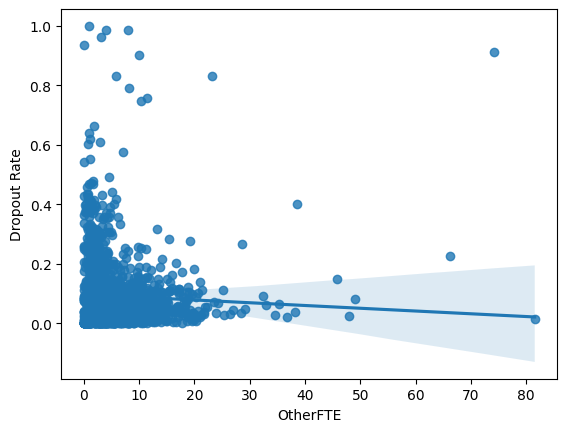

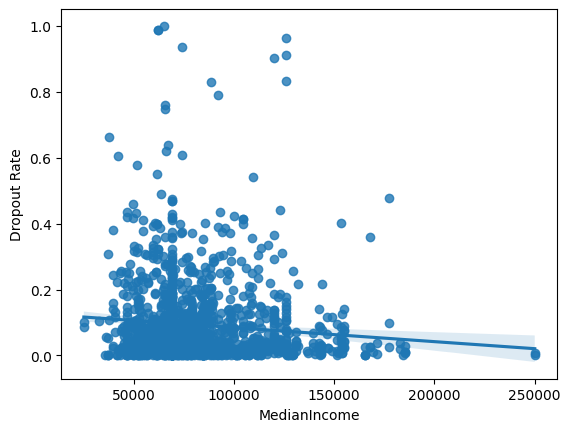

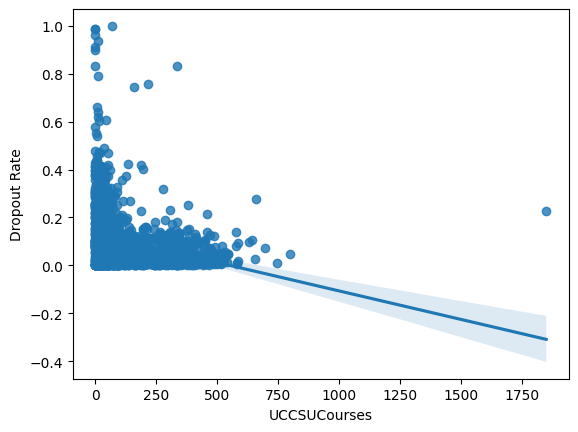

In [ ]:
for col in ['total_students',
       'FundPerStudent', 'Free Meal Count (K-12)',
       'Percent (%) Eligible Free (K-12)', 'ClearFTE', 'OtherFTE',
       'MedianIncome',  'UCCSUCourses']:
    sns.regplot(x=col, y='Dropout Rate', data=data)
    plt.show()

    # 'SchoolName','DistrictCode', 'DistrictName', 'CountyCode', 'CountyName', not for visuals

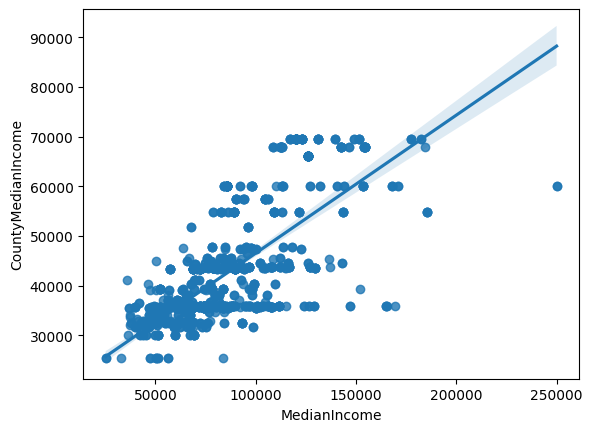

In [ ]:
sns.regplot(x='MedianIncome', y='CountyMedianIncome', data=data)
plt.show()

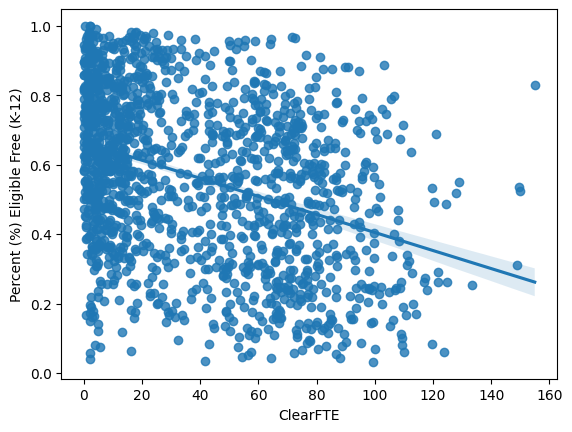

In [ ]:
sns.regplot(x='ClearFTE', y='Percent (%) Eligible Free (K-12)', data=data)
plt.show()

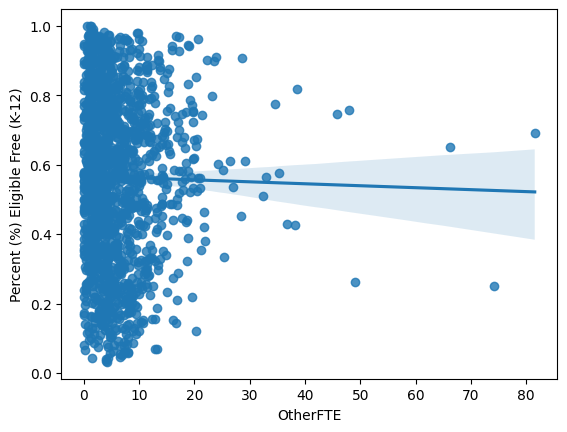

In [ ]:
sns.regplot(x='OtherFTE', y='Percent (%) Eligible Free (K-12)', data=data)
plt.show()

## Modeling

We will try beta regression, decision trees and neural network models in this part of analysis

In [11]:
data_traditional.columns

Index(['SchoolCode', 'total_students', 'Dropout Rate', 'SchoolName',
       'DistrictCode', 'DistrictName', 'CountyCode', 'CountyName',
       'FundPerStudent', 'Educational Option Type', 'Enrollment (K-12)',
       'Free Meal Count (K-12)', 'Percent (%) Eligible Free (K-12)',
       'Enrollment (Ages 5-17)', 'TotalFTE', 'ClearFTE', 'OtherFTE',
       'EnrollmentTotal', 'EnrollmentWhitePct', 'EnrollmentBlackPct',
       'EnrollmentAsianPct', 'EnrollmentHispanicPct', 'EnrollmentNativePct',
       'CountyMedianIncome', 'MedianIncome', 'TotalCourses', 'TotalEnrollment',
       'UCCSUCourses', 'UCCSUEnrollmentPct', 'StaffACourses',
       'StaffAEnrollmentPct', 'StaffBCourses', 'StaffBEnrollmentPct',
       'StaffNCourses', 'StaffNEnrollmentPct', 'NCLBCoreCourses',
       'NCLBEnrollmentPct'],
      dtype='object')

In [12]:
endog=data_traditional['Dropout Rate']
# columns=['total_students',
#        'FundPerStudent', 'Free Meal Count (K-12)',
#        'Percent (%) Eligible Free (K-12)', 'ClearFTE', 'OtherFTE',
#        'CountyMedianIncome',  'TotalCourses', 'TotalEnrollment',
#        'UCCSUCourses', 'UCCSUEnrollmentPct', 'StaffACourses',
#        'StaffAEnrollmentPct', 'Alternative School of Choice',
#        'Community Day School', 'Continuation School',
#        'Special Education School', 'Traditional','MedianIncome']
columns=['FundPerStudent', 'Percent (%) Eligible Free (K-12)', 'ClearFTE', 'OtherFTE',
       'MedianIncome', 'TotalEnrollment','UCCSUEnrollmentPct','NCLBEnrollmentPct']
exog=data_traditional[columns]


In [13]:
exog.fillna(0, inplace=True)
exog.isna().any()

<ipython-input-13-c2b895c3c225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exog.fillna(0, inplace=True)


FundPerStudent                      False
Percent (%) Eligible Free (K-12)    False
ClearFTE                            False
OtherFTE                            False
MedianIncome                        False
TotalEnrollment                     False
UCCSUEnrollmentPct                  False
NCLBEnrollmentPct                   False
dtype: bool

In [14]:
data_traditional['UCCSUCourses'].describe()

count    1059.000000
mean      218.596789
std       155.583434
min         0.000000
25%        87.500000
50%       200.000000
75%       326.500000
max      1851.000000
Name: UCCSUCourses, dtype: float64

It seems that dropout rate have a strong correlation with value, free meal count, totalFTE, clearFTE, Enrollment Total. There are also a strong relationshiip between cohortstudents and totalFTE, clearFTE, Enrollment total. We might need some interactions here.

In [16]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import itertools

# Generate some sample data
y = endog # Input features
X = exog  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
mod = sm.GLM(y_train, X_train, family=sm.families.Binomial())
rslt = mod.fit()

print(rslt.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Dropout Rate   No. Observations:                  635
Model:                            GLM   Df Residuals:                      627
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.12
Date:                Mon, 24 Jul 2023   Deviance:                       44.104
Time:                        00:31:30   Pearson chi2:                     57.4
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02308
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
FundPerS

In [ ]:
pred = rslt.predict(X_test)
mse = np.mean(pred-y_test)
mse

0.00863140531533465

From the output of the GLM model, we can see that total_students, alternative school of choice, continuation school and traditional school have p value less than 0.05 (the threshold we made).

In [ ]:



# SelectKBest based on mutual information
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=3)  # Choose the desired number of features
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
selected_features
# mean_squared_error(y_test,selector.predict(X_test))

Index(['ClearFTE', 'OtherFTE', 'UCCSUEnrollmentPct'], dtype='object')

In [19]:

# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
feature_importance = model.feature_importances_
selected_features = X_train.columns[feature_importance.argsort()[::-1][:5]]
selected_features
mean_squared_error(y_test,y_pred)

0.008012977837662355

In [22]:
# Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
model = RandomForestRegressor()

rfe = RFE(model, n_features_to_select=3)  # Choose the desired number of features
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

selected_features
mean_squared_error(y_test,rfe.predict(X_test))

0.007500890974658589

In [23]:
selected_features

Index(['Percent (%) Eligible Free (K-12)', 'ClearFTE', 'UCCSUEnrollmentPct'], dtype='object')

In [ ]:
# def best_subset_selection(X_train, X_test, y_train, y_test, model):
#     best_score = float('inf')
#     best_subset = []

#     n_features = len(X_train.columns)

#     for k in range(1, n_features + 1):
#         for subset in itertools.combinations(X_train.columns, k):
#             X_train_subset = X_train[list(subset)]
#             X_test_subset = X_test[list(subset)]

#             model.fit(X_train_subset, y_train)
#             y_pred = model.predict(X_test_subset)

#             score = mean_squared_error(y_test, y_pred)

#             if score < best_score:
#                 best_score = score
#                 best_subset = list(subset)

#     return best_subset


In [ ]:
# model = LinearRegression()
# best_features = best_subset_selection(X_train, X_test, y_train, y_test, model)
# print("Best features:", best_features)

### Decision Trees

The Regression Tree model is simple, efficient, and interpretable. The target variable of the Regression Tree will be the dropping out rate of a school, and the features will be the relevant socioeconomic variables we identified and engineered in section 3.1. Using this method, we do not put any restriction on our data. We will construct a tree that splits the data based on these features in a way that best separates schools with different levels of dropping out rates.



Mean Squared Error: 0.011596346883073016


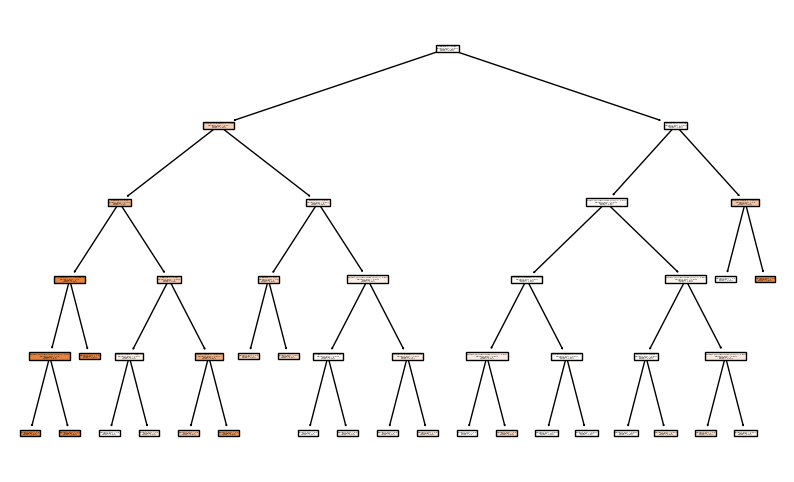

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Generate some sample data
y = endog # Input features
X = exog  # Target variable

# Split the data into training and test sets


# Create a regression tree model
tree = DecisionTreeRegressor(max_depth=5)

# Train the model
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=columns, filled=True)
plt.show()

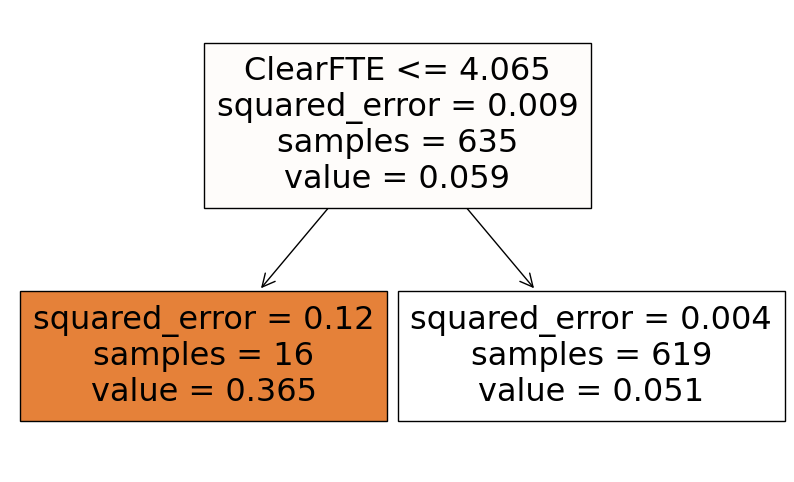

In [ ]:
# See what is the most important variable
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=columns, filled=True)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Generate some sample data
y = endog # Input features
X = exog  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


model = RandomForestRegressor()  # for regression
model = RandomForestClassifier()  # for classification

# Train the model on the training data
#model.fit(X_train, y_train)

# Generate some sample data
y = endog # Input features
X = exog  # Target variable

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a regression tree model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0075828523136864875


### Neural Network

The Neural Network model can handle more complex relationships and can even automatically detect interactions between variables. The tradeoff is that they require more computational resources and can be more challenging to interpret than previous ones. We will construct a Neural Network that includes the input layer, hidden layers, and output layers to map the various features of a school to its dropping out rate. We can train our model on California data first, and calibrate the parameters specifically for LA county.


train score 0.6001871384524906
test score 0.3013948370279549
pred [0.0267 0.0289 0.0368 0.0196 0.0334 0.089  0.3985 0.0383 0.0487 0.039  0.0223 0.0361 0.0654 0.017  0.0684 0.0172 0.034  0.0258 0.0549 0.027  0.0327 0.0279 0.05   0.0126 0.0196 0.0444 0.0575 0.0397
 0.0464 0.0271 0.0469 0.0506 0.0411 0.0404 0.033  0.0982 0.0292 0.0472 0.0512 0.0215 0.051  0.03   0.048  0.0183 0.0349 0.0339 0.1    0.0304 0.0577 0.0282 0.0356 0.012  0.0489 0.0945 0.0102 0.036
 0.0176 0.0389 0.0543 0.0273 0.0315 0.0372 0.0478 0.0341 0.019  0.0512 0.0292 0.0237 0.0638 0.0511 0.0167 0.0191 0.017  0.0326 0.0368 0.0384 0.0208 0.0421 0.0643 0.0103 0.0253 0.0217 0.0507 0.0159
 0.0433 0.0184 0.0276 0.021  0.0333 0.0237 0.0507 0.0421 0.0244 0.0301 0.0639 0.8862 0.0152 0.0378 0.0732 0.0282 0.0396 0.0139 0.0498 0.0374 0.0219 0.0531 0.0443 0.0549 0.0445 0.076  0.0627 0.0427
 0.0189 0.0358 0.1962 0.0469 0.0468 0.0119 0.0315 0.0234 0.0476 0.0239 0.03   0.0165 0.0549 0.0261 0.0426 0.0409 0.0191 0.0195 0.0325 0.0279 0.0102

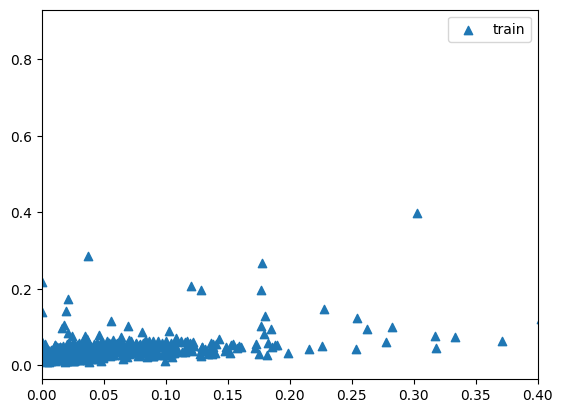

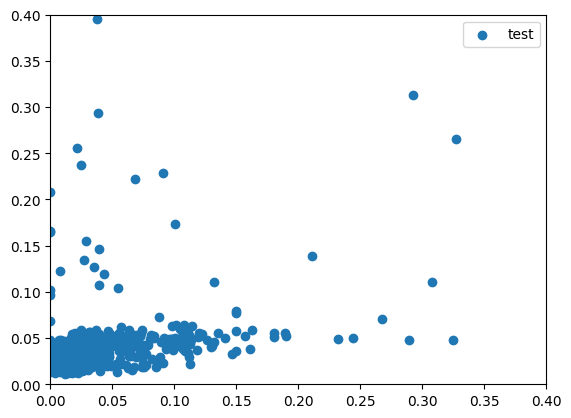

train mean squared error 0.003749280707434107
test mean squared error 0.005515571856649492


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
np.set_printoptions(precision=4, linewidth=200, suppress=True)
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
'''# Generate some sample data
y = endog # Input features
X = exog  # Target variable

# shuffle data
p = np.random.permutation(len(X))
X = np.array(X)[p]
y = np.array(y)[p]
train_xs = X[:int(len(X)*0.8)]
train_ys = y[:int(len(X)*0.8)]
test_xs = X[int(len(X)*0.8):]
test_ys = y[int(len(X)*0.8):]'''
X_train1 = X_train.drop(['NCLBEnrollmentPct'], axis=1)
X_test1 = X_test.drop(['NCLBEnrollmentPct'], axis=1)
greg = MLPRegressor(hidden_layer_sizes=(128,64,16), max_iter=int(1e4), learning_rate_init=1e-2, alpha=2e-4, tol=5e-5)
reg = make_pipeline(MinMaxScaler(), greg)
reg = reg.fit(X_train1, y_train)
print('train score', reg.score(X_train1, y_train))
print('test score', reg.score(X_test1, y_test))
print('pred', reg.predict(X_train1), y_train)
print('pred', reg.predict(X_test1), y_test)
pys = np.concatenate([y_train, y_test])
pxs = np.concatenate([X_train1, X_test1])

plt.scatter( y_train, reg.predict(X_train1), marker='^', label='train')
plt.legend()
plt.xlim(0,0.4)
plt.show()
plt.scatter( y_test, reg.predict(X_test1), marker='o', label='test')
plt.legend()
plt.xlim([0, 0.4])
plt.ylim([0, 0.4])
plt.show()
#print(y_test[-10:])
#print(reg.predict(test_xs)[-10:])
#print(reg[1].loss_curve_)
train_mse = mean_squared_error(y_train, reg.predict(X_train1))
test_mse = mean_squared_error(y_test, reg.predict(X_test1))
print('train mean squared error', train_mse)
print('test mean squared error', test_mse)

# save model
with open('nn_model.pkl','wb') as f:
    pickle.dump(reg,f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal

avg_xs (1, 7) (424, 7) [0.038]
0 [0.0391 0.0385 0.038  0.0298 0.0215] [0.03007464784790611, 0.015037323923953147, -0.214719704997482, -0.4331321358976514]
1 [0.0184 0.0256 0.038  0.0477 0.0593] [-0.5142536896787641, -0.3245954271671486, 0.25662599459165264, 0.5622175130857721]
2 [0.0534 0.0374 0.038  0.0335 0.0297] [0.4053394251929909, -0.015930776500960545, -0.11688000714631293, -0.2164594452906145]
3 [0.0318 0.035  0.038  0.0511 0.0625] [-0.1611140659205011, -0.0791263822176178, 0.3448525315185476, 0.646040734819327]
4 [0.0356 0.0368 0.038  0.035  0.0279] [-0.0625192533116022, -0.03120586777512297, -0.07838305399156403, -0.26546729844047595]
5 [0.0308 0.0334 0.038  0.0418 0.0428] [-0.1875748677817411, -0.12019678162506016, 0.10132337120693907, 0.12796333331609036]
6 [0.0413 0.0394 0.038  0.0331 0.0239] [0.08682120083528364, 0.036683942969386776, -0.12873875848886462, -0.37008041166521904]


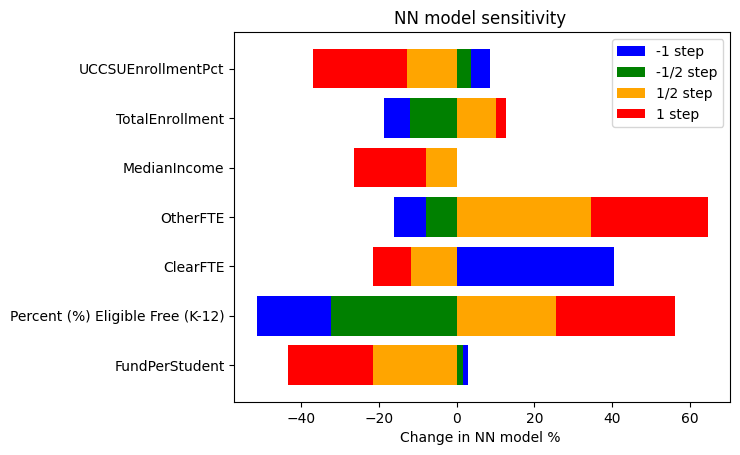

In [ ]:

p = np.random.permutation(np.arange(len(X_test1)))
xs = X_test1.to_numpy()[p]
y1s = y_test.to_numpy()[p]

reg = pickle.load(open('./nn_model.pkl', 'rb'))

avg_xs = np.mean(xs, axis=0, keepdims=True)
min_xs = np.amin(xs, axis=0, keepdims=True)
max_xs = np.amax(xs, axis=0, keepdims=True)

y0 = reg.predict(avg_xs)

print('avg_xs', avg_xs.shape, xs.shape, y0)

sensi_ys = []
for f_i  in range(xs.shape[1]):
    nxs = np.concatenate([avg_xs for _ in range(5)],  axis=0)
    nxs[0, f_i] = min_xs[0, f_i]
    nxs[1, f_i] = (min_xs[0, f_i] + avg_xs[0, f_i] ) / 2.
    nxs[3, f_i] = (max_xs[0, f_i] + avg_xs[0, f_i] ) / 2.
    nxs[4, f_i] = max_xs[0, f_i]

    nys = reg.predict(nxs)
    nys2 = []
    nys2.append( (nys[0]-nys[2])/nys[2] )
    nys2.append( (nys[1]-nys[2])/nys[2] )
    nys2.append( (nys[3]-nys[2])/nys[2] )
    nys2.append( (nys[4]-nys[2])/nys[2] )
    print(f_i, nys, nys2)
    sensi_ys.append(nys2)

sensi_ys = np.array(sensi_ys)
sensi_ys *= 100
columns2=['FundPerStudent', 'Percent (%) Eligible Free (K-12)', 'ClearFTE', 'OtherFTE',
       'MedianIncome', 'TotalEnrollment','UCCSUEnrollmentPct']
feature_names = columns2
plt.figure()
b4 = plt.barh(feature_names, sensi_ys[:,3], color="red")
b1 = plt.barh(feature_names, sensi_ys[:,0], color="blue")
b2 = plt.barh(feature_names, sensi_ys[:,1], color="green")
b3 = plt.barh(feature_names, sensi_ys[:,2], color="orange")


plt.legend([b1, b2, b3, b4], ["-1 step", "-1/2 step","1/2 step", "1 step",], loc="upper right")
plt.xlabel("Change in NN model % ")
plt.title("NN model sensitivity ")

plt.show()